# Project: Wrangling and Analyze Data

## 1. Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [103]:
import pandas as pd
twitter_df = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [104]:
image_df = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [105]:
import json

tweets_info = []

with open('tweet-json.txt', encoding='utf-8') as tweet_json_file:
    for line in tweet_json_file:
        tweet_data = json.loads(line)        
        tweet_id = tweet_data['id']
        favorite_count = tweet_data['favorite_count']
        retweet_count = tweet_data['retweet_count']  
        short_url = 'https://' + tweet_data['full_text'].split('https://')[-1]
        tweets_info.append((tweet_id, favorite_count, retweet_count, short_url))

tweet_info_df = pd.DataFrame(tweets_info, columns=['tweet_id', 'like_count', 'retweet_count', 'short_url'])

## 2. Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

In [106]:
twitter_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,NaN,NaN,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,NaN,NaN,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,NaN,NaN,NaN
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,NaN,NaN,NaN


In [107]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

In [108]:
image_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [109]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Quality issues

1. [Incorrect numerator and denominator values](#Q1)
2. [Normalize numerator and denominator to base 10 and retain only numerators between 0 and 20](#Q2)
3. [Extract the client information from the source](#Q3)
4. [Replace NaN values in the 'name' column with 'unknown'](#Q4)
5. [Remove names starting with lowercase letters](#Q5)
6. [Retain only the original contributions](#Q6)
7. [Keep only data entries that include ratings](#Q7)
8. [Change data type for consistency](#Q8)

### Tidiness issues

1. [Separate dog characteristics into one column](#T1)
2. [Create a column for the most likely dog breed prediction and its corresponding confidence level](#T2)
3. [Consolidate relevant columns from three data frame copies into a single data frame](#T3)

## 3. Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [110]:
# Make copies of original pieces of data
twitter_copy = twitter_df.copy()
image_copy = image_df.copy()
tweet_info_copy = tweet_info_df.copy()

<a id='Q1'></a>
### Issue #1:

#### Define:

Read the numerator and denominator on the back of the text and replace them with the existing columns

#### Code

In [111]:
twitter_copy[['rating_numerator', 'rating_denominator']] = twitter_copy['text'].str.extractall(r'(\d+[.]?\d*)/(\d+)').groupby(level=0).last()

#### Test

In [112]:
twitter_copy[['rating_numerator', 'rating_denominator']].value_counts()

rating_numerator  rating_denominator
12                10                    557
11                10                    466
10                10                    454
13                10                    355
9                 10                    156
8                 10                    104
14                10                     56
7                 10                     55
5                 10                     34
6                 10                     33
3                 10                     19
4                 10                     16
2                 10                     10
1                 10                      9
420               10                      2
15                10                      2
9.75              10                      2
0                 10                      2
45                50                      1
80                80                      1
60                50                      1
666               10                   

<a id='Q2'></a>
### Issue #2:

#### Define:

Adjust numerator and denominator to base 10 and leave only the numerators between 0 and 20

#### Code

In [113]:
import numpy as np

scaled_ratio = twitter_copy['rating_numerator'].astype(float) * 10 / twitter_copy['rating_denominator'].astype(float)
is_valid_ratio = (scaled_ratio.between(0, 20)) & (scaled_ratio * 100 % 1 == 0)
twitter_copy['rating_numerator'] = np.where(is_valid_ratio, scaled_ratio, None)
twitter_copy['rating_denominator'] = np.where(is_valid_ratio, 10, None)

#### Test

In [114]:
twitter_copy[['rating_numerator', 'rating_denominator']].value_counts()

rating_numerator  rating_denominator
12.00             10                    561
11.00             10                    472
10.00             10                    455
13.00             10                    355
9.00              10                    157
8.00              10                    104
7.00              10                     56
14.00             10                     56
5.00              10                     34
6.00              10                     33
3.00              10                     19
4.00              10                     16
2.00              10                     11
1.00              10                      9
0.00              10                      2
9.75              10                      2
15.00             10                      2
11.27             10                      1
12.50             10                      1
11.26             10                      1
13.50             10                      1
9.50              10                   

<a id='Q3'></a>
### Issue #3:

#### Define:

Extract the client from the source

#### Code

In [115]:
from bs4 import BeautifulSoup

twitter_copy['client'] = twitter_copy['source'].apply(BeautifulSoup, args=('html.parser',)).apply(BeautifulSoup.get_text)

#### Test

In [116]:
twitter_copy['client'] .value_counts()

client
Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: count, dtype: int64

<a id='Q4'></a>
### Issue #4:

#### Define:
For name, replace NaN values with unknown

#### Code

In [117]:
twitter_copy['name'] = twitter_copy['name'].replace(np.nan, 'unknown')

#### Test

In [118]:
twitter_copy.name.value_counts()

name
unknown       745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: count, Length: 957, dtype: int64

<a id='Q5'></a>
### Issue #5:

#### Define:

Remove names beginning with lower case letters

#### Code

In [119]:
twitter_copy.loc[~twitter_copy['name'].isna() & twitter_copy['name'].str.match(r'^[a-z]', na=False), 'name'] = 'unknown'

#### Test

In [120]:
print(sorted(twitter_copy['name'].unique()))

['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al', 'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander', 'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber', 'Ambrose', 'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel', 'Anna', 'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen', 'Arlo', 'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh', 'Aspen', 'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn', 'Ava', 'Axel', 'Bailey', 'Baloo', 'Balto', 'Banditt', 'Banjo', 'Barclay', 'Barney', 'Baron', 'Barry', 'Batdog', 'Bauer', 'Baxter', 'Bayley', 'BeBe', 'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo', 'Bell', 'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny', 'Bentley', 'Berb', 'Berkeley', 'Bernie', 'Bert', 'Bertson', 'Betty', 'Beya', 'Biden', 'Bilbo', 'Billl', 'Billy', 'Binky', 'Birf', 'Bisquick', 'Blakely', 'Blanket', 'Blipson', 'Blitz', 'Bloo', 'Bloop', 'Blu', 'Blue', 'Bluebert', 'Bo', 'Bob', 'Bobb', 'Bobbay', 'Bobble', 'Bobby', 'Bode', 'Bodie', 'Bonapart

<a id='Q6'></a>
### Issue #6:

#### Define:

Keep only the original contribution

#### Code

In [121]:
twitter_copy = twitter_copy.query('in_reply_to_status_id.isna() & retweeted_status_id.isna()')

#### Test

In [122]:
twitter_copy.query('in_reply_to_status_id.notna() | retweeted_status_id.notna()')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,client


<a id='Q7'></a>
### Issue #7:

#### Define:

Only keep data that contains the valuation

#### Code

In [123]:
twitter_copy = twitter_copy.query('rating_numerator.notna()')

#### Test

In [124]:
twitter_copy.query('rating_numerator.isna()')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,client


<a id='Q8'></a>
### Issue #8:

#### Define: 

Changing the D-type

#### Code

In [125]:
twitter_copy['timestamp'] = pd.to_datetime(twitter_copy['timestamp'])
twitter_copy['rating_numerator'] = twitter_copy['rating_numerator'].astype('float32')
twitter_copy['rating_denominator'] = twitter_copy['rating_denominator'].astype('int8')
twitter_copy['client'] = twitter_copy['client'].astype('category')

#### Test

In [126]:
twitter_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2094 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2094 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2094 non-null   datetime64[ns, UTC]
 4   source                      2094 non-null   object             
 5   text                        2094 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2091 non-null   object             
 10  rating_numerator            2094 non-null   float32            
 

<a id='T1'></a>
### Issue #9:

#### Define:

Write the characteristics of the dog in a separate column

#### Code

In [127]:
def merge_columns(row):
    return ' & '.join(filter(pd.notna, row)) or None

twitter_copy['properties'] = twitter_copy[['doggo', 'floofer', 'pupper', 'puppo']].apply(merge_columns, axis=1)

#### Test

In [128]:
twitter_copy.properties.value_counts()

properties
pupper             221
doggo               72
puppo               23
floofer              9
doggo & pupper       9
doggo & puppo        1
doggo & floofer      1
Name: count, dtype: int64

<a id='T2'></a>
### Issue #10:

#### Define: 
Write the most probable prediction and the highest reliability in a separate column

#### Code

In [129]:
def get_pred_conf(row):
    if row['p1_dog']:
        return row['p1'], row['p1_conf']
    elif row['p2_dog']:
        return row['p2'], row['p2_conf']
    elif row['p3_dog']:
        return row['p3'], row['p3_conf']
    else:
        return None, None

image_copy[['prediction', 'reliability']] = image_copy.apply(get_pred_conf, axis=1, result_type='expand')

#### Test

In [130]:
image_copy

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,prediction,reliability
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,basset,0.555712
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,Labrador_retriever,0.168086
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua,0.716012
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,Chihuahua,0.323581


<a id='T3'></a>
### Issue #11:

#### Define:
Merge the relevant columns of the three data frame copies into one data frame

#### Code

In [131]:
twitter_columns = ['tweet_id', 'timestamp', 'client', 'text', 'name', 'properties', 'rating_numerator']
image_columns = ['tweet_id', 'jpg_url', 'prediction', 'reliability']
merged_df = pd.merge(twitter_copy[twitter_columns], tweet_info_copy, on='tweet_id', how='inner')
df = pd.merge(merged_df, image_copy[image_columns], on='tweet_id', how='inner')

#### Test

In [132]:
df

,tweet_id,timestamp,client,text,name,properties,rating_numerator,like_count,retweet_count,short_url,jpg_url,prediction,reliability
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,None,13.0,39467,8853,https://t.co/MgUWQ76dJU,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,Tilly,None,13.0,33819,6514,https://t.co/0Xxu71qeIV,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,Archie,None,12.0,25461,4328,https://t.co/wUnZnhtVJB,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,Darla,None,13.0,42908,8964,https://t.co/tD36da7qLQ,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,Franklin,None,12.0,41048,9774,https://t.co/AtUZn91f7f,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,unknown,None,5.0,111,41,https://t.co/4B7cOc1EDq,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311
1964,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,unknown,None,6.0,311,147,https://t.co/DWnyCjf2mx,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
1965,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,unknown,None,9.0,128,47,https://t.co/y671yMhoiR,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
1966,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,unknown,None,7.0,132,48,https://t.co/r7mOb2m0UI,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [133]:
df.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Development over time
How have likes and retweets developed over time?

### Insights:
1. Steady growth in likes: The number of likes shows steady growth over time. This could indicate an increasing popularity of the tweets, a growing number of followers or a higher engagement rate.

2. Retweets less volatile than likes: Retweets appear to be less volatile and show a more consistent rate. This could indicate that users are more selective when it comes to what they retweet as opposed to what they like.

3. No sharp spikes or dips: There are no sudden spikes or dips in the data, which could indicate that the tweets are subject to natural and organic growth without being influenced by individual viral events.

4. Likes grow faster than retweets: Likes appear to be growing faster than retweets, suggesting that users are more willing to show their approval of a tweet by liking it than by retweeting it.

5. Potential influence of external events: Although not directly indicated by the data, external events such as holidays, news events or marketing campaigns may have influenced the growth of likes and retweets. More detailed analysis may be required to identify such influences.

6. Relevance of content strategy: The steady increase could also be an indication of a successful content strategy that consistently delivers content that appeals to the audience.

### Visualization

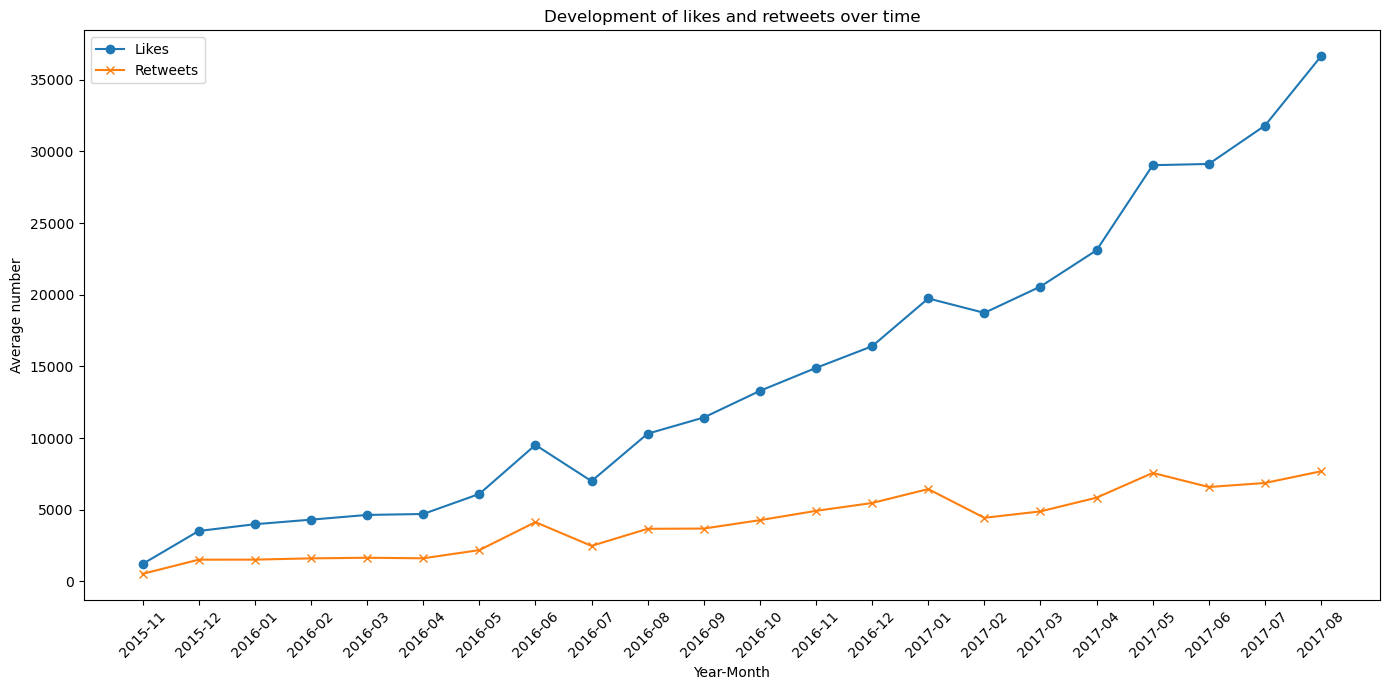

In [134]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

df['month_year'] = df['timestamp'].dt.to_period('M')

monthly_avg = df.groupby('month_year').agg({'like_count':'mean', 'retweet_count':'mean'}).reset_index()

plt.figure(figsize=(14, 7))
plt.plot(monthly_avg['month_year'].astype(str), monthly_avg['like_count'], label='Likes', marker='o')
plt.plot(monthly_avg['month_year'].astype(str), monthly_avg['retweet_count'], label='Retweets', marker='x')

plt.xticks(rotation=45)
plt.ylabel('Average number')
plt.xlabel('Year-Month')
plt.title('Development of likes and retweets over time')
plt.legend()
plt.tight_layout()
plt.show()

### Distribution of the ratings
What can you recognise from the distribution of the ratings?

### Insights:
1. Right-skewed distribution: The data shows a right-skewed (positively skewed) distribution, which indicates that users tend to give higher ratings. Higher ratings are more common than lower ratings.

2. Frequent high ratings: Ratings in the range of 10 to 14 are particularly common, with ratings of 12 showing a noticeable peak. This could indicate that the user tends to give higher than average ratings.

3. Low frequency of low ratings: Ratings below 10 are less common, which could indicate that the user is either positively biased or that the rated content is generally of high quality.

4. Deviation from the normal distribution: The distribution of ratings does not correspond to a normal distribution, which often occurs in real data sets, especially in rating systems with subjective judgements.

5. Possible rating tendencies: The concentration of ratings at the top of the scale could indicate a tendency to "round up" in this particular context. This phenomenon is common in social media, where users tend to give more positive ratings to encourage social recognition or simply because of a positive attitude.

### Visualization

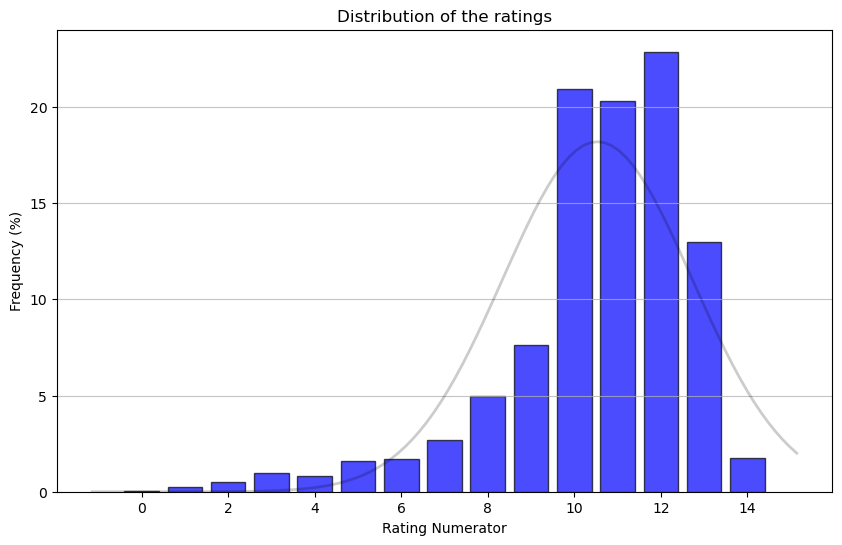

In [135]:
from scipy.stats import norm

df['rating_numerator'] = df['rating_numerator'][(df['rating_numerator'] >= 0) & (df['rating_numerator'] <= 14)]

bins = np.arange(-0.5, 15, 1)
bin_centers = np.arange(0, 15, 1)

hist_data, _ = np.histogram(df['rating_numerator'], bins=bins)
bin_probability = hist_data / hist_data.sum()
mu, std = norm.fit(df['rating_numerator'])

bin_percentage = bin_probability * 100

plt.figure(figsize=(10, 6))
plt.bar(bin_centers, bin_percentage, alpha=0.7, color='blue', edgecolor='black', align='center')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p * 100, 'k', linewidth=2, alpha=0.2)

plt.xlabel('Rating Numerator')
plt.ylabel('Frequency (%)')
plt.title('Distribution of the ratings')
plt.grid(axis='y', alpha=0.75)

plt.show()